In [74]:
# Packages:
import pandas as pd
import matplotlib.pyplot as plt
import plotly.express as px
import plotly.graph_objects as go
from urllib.request import urlopen
import json
import datetime
import numpy as np
import warnings
from textblob import TextBlob
import re
from wordcloud import WordCloud
import scipy.stats as st
import scipy
from scipy import stats
import statsmodels.api as sm

In [125]:
df = pd.read_csv('data/processed/branson_cleaned.csv')
df.head()

,Date,Price,Price_scaled,Price_delta,Tweets,Agg_count,Agg_retweet,Agg_favorite,Subjectivity_mean,Polarity_mean,Polarity_scaled,Polarity_delta,Favorite_scaled,Retweet_scaled
0,2019-01-02,10.02,0.053650,NaN,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,2019-01-03,10.00,0.053267,-0.000383,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,2019-01-04,10.04,0.054033,0.000766,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,2019-01-07,10.03,0.053842,-0.000192,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,2019-01-08,10.04,0.054033,0.000192,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


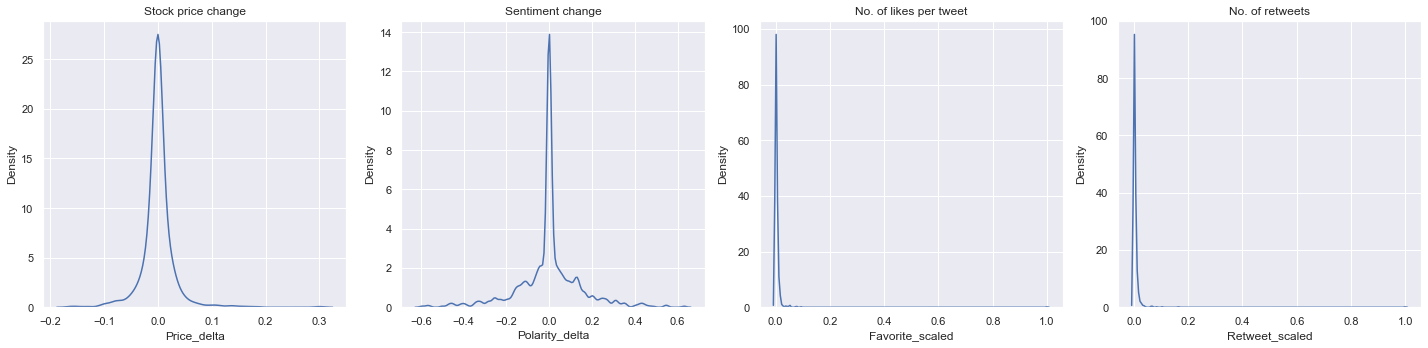

In [126]:
fig, (ax1, ax2, ax3, ax4) = plt.subplots(1, 4, figsize = (20, 5))

sns.kdeplot(ax=ax1, x=df['Price_delta'], bw_adjust=1).set_title('Stock price change')
sns.kdeplot(ax=ax2, x=df['Polarity_delta'], bw_adjust=0.27).set_title('Sentiment change')
sns.kdeplot(ax=ax3, x=df['Favorite_scaled'], bw_adjust=0.27).set_title('No. of likes per tweet')
sns.kdeplot(ax=ax4, x=df['Retweet_scaled'], bw_adjust=0.27).set_title('No. of retweets')

plt.tight_layout()

In [127]:
df.describe()

,Price,Price_scaled,Price_delta,Agg_count,Agg_retweet,Agg_favorite,Subjectivity_mean,Polarity_mean,Polarity_scaled,Polarity_delta,Favorite_scaled,Retweet_scaled
count,735.000000,735.000000,734.000000,735.000000,735.000000,735.000000,735.000000,735.000000,735.000000,735.000000,735.000000,735.000000
mean,19.458163,0.234492,0.000156,4.229932,333.526531,1937.985034,0.324213,0.188498,0.327838,0.000191,0.005212,0.005807
std,10.087239,0.193279,0.030915,5.349902,2188.086998,13967.776752,0.268322,0.196003,0.249892,0.145938,0.037568,0.038096
min,7.220000,0.000000,-0.163058,0.000000,0.000000,0.000000,0.000000,-0.400000,0.000000,-0.595238,0.000000,0.000000
25%,10.400000,0.060931,-0.007233,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-0.042035,0.000000,0.000000
50%,17.420000,0.195440,0.000000,2.000000,105.000000,661.000000,0.393750,0.187374,0.419553,0.000000,0.001778,0.001828
75%,24.605001,0.333110,0.006323,7.000000,300.000000,1720.000000,0.525228,0.317731,0.512665,0.047527,0.004626,0.005223
max,59.410000,1.000000,0.299866,40.000000,57436.000000,371803.000000,1.000000,1.000000,1.000000,0.630952,1.000000,1.000000


In [12]:
#from scipy.stats import boxcox

#df['transformed_return'], lam = boxcox(df["Return"])


In [128]:
numeric_df = df.filter(items=['Price_scaled','Price_delta', 'Polarity_delta', 'Favorite_scaled', 'Retweet_scaled'])
corr1 = numeric_df.corr()
corr2 = numeric_df.corr(method='spearman')

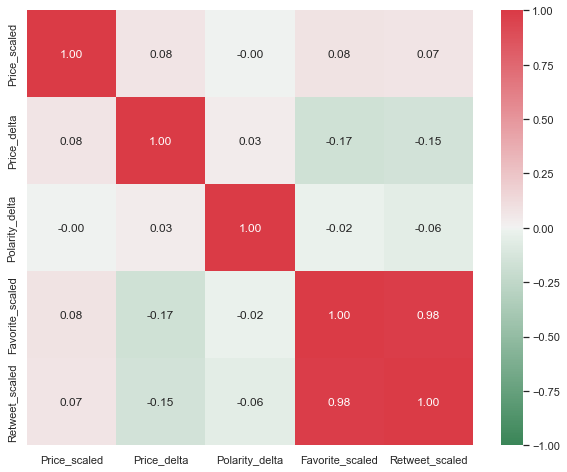

In [129]:
sns.heatmap(corr1, annot=True, cmap=sns.diverging_palette(140, 10, as_cmap=True), fmt='.2f', vmin=-1, vmax=1)
plt.show()

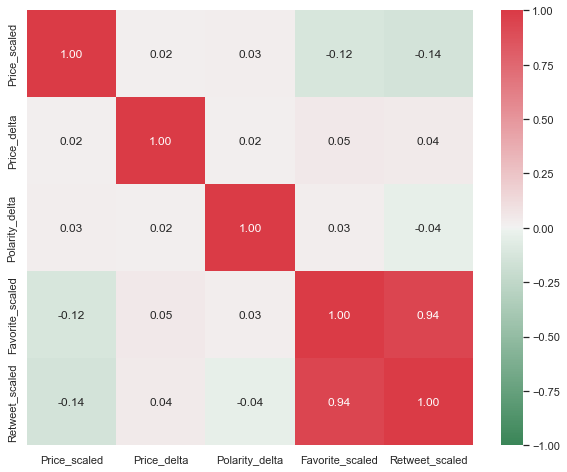

In [130]:
sns.heatmap(corr2, annot=True, cmap=sns.diverging_palette(140, 10, as_cmap=True), fmt='.2f', vmin=-1, vmax=1)
plt.show()

In [131]:
print("H0: the changes in stock market prices are different compared to the change in CEO's Twitter sentiment") 
print("H1: the changes in stock market prices are similar compared to the change in CEO's Twitter sentiment")

statistic = st.ttest_ind(df['Price_delta'], df['Polarity_delta'], axis=0, equal_var=False, alternative='two-sided', nan_policy='omit')[0]
pvalue = st.ttest_ind(df['Price_delta'], df['Polarity_delta'], axis=0, equal_var=False, alternative='two-sided', nan_policy='omit')[1]

print('statistic = ',statistic)
print('pvalue = ',pvalue)

if pvalue<= 0.05:
    print('We reject the null hypothesis')
else:
    print('We fail to reject the null hypothesis')

H0: the changes in stock market prices are different compared to the change in CEO's Twitter sentiment
H1: the changes in stock market prices are similar compared to the change in CEO's Twitter sentiment
statistic =  -0.006344646734594365
pvalue =  0.9949393203732397
We fail to reject the null hypothesis


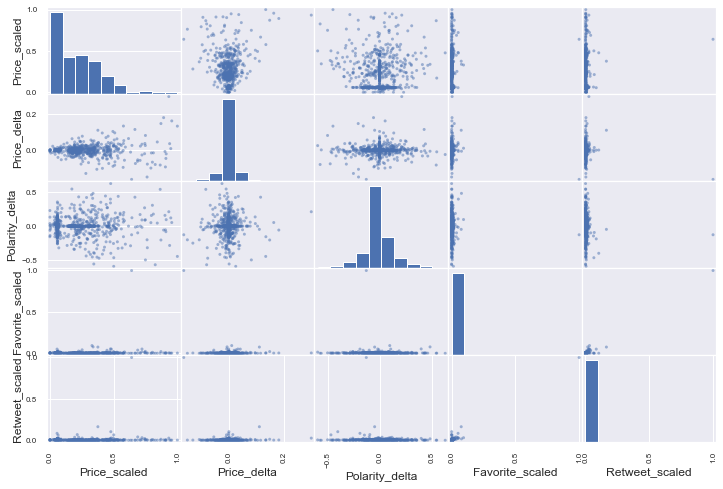

In [136]:
from pandas.plotting import scatter_matrix
df_sm = df[['Price_scaled','Price_delta', 'Polarity_delta','Favorite_scaled', 'Retweet_scaled']]
df_sm.dropna(inplace=True)
scatter_matrix(df_sm, figsize=(12,8));

In [133]:
scipy.stats.shapiro(df_sm['Price_delta'])

ShapiroResult(statistic=0.7528862953186035, pvalue=1.0787124919854712e-31)

In [134]:
scipy.stats.shapiro(df_sm['Polarity_delta'])

ShapiroResult(statistic=0.9028864502906799, pvalue=3.5576222274403105e-21)

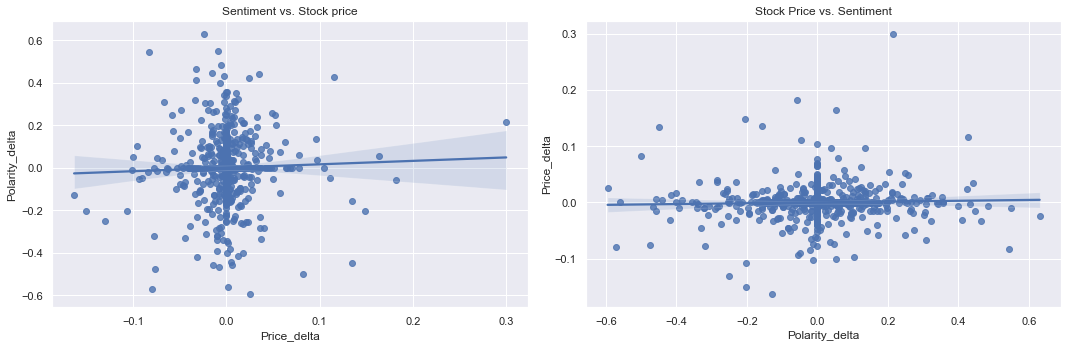

In [152]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize = (15, 5))
sns.regplot(data = df_sm, x='Price_delta', y='Polarity_delta', lowess=False, ax=ax1).set(title='Sentiment vs. Stock price')
sns.regplot(data = df_sm, x='Polarity_delta', y='Price_delta', lowess=False, ax=ax2).set(title='Stock Price vs. Sentiment')

plt.tight_layout()

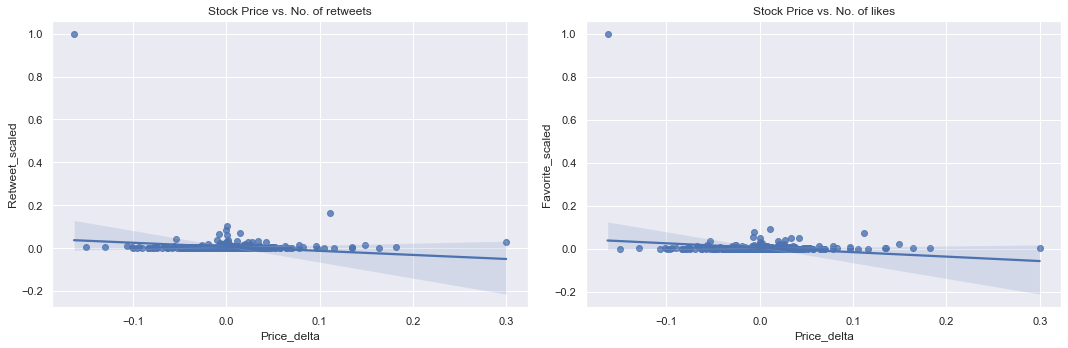

In [151]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize = (15, 5))
sns.regplot(data = df_sm, x='Price_delta', y='Retweet_scaled', lowess=False, ax=ax1). set(title='Stock Price vs. No. of retweets')
sns.regplot(data = df_sm, x='Price_delta', y='Favorite_scaled', lowess=False, ax=ax2). set(title='Stock Price vs. No. of likes')

plt.tight_layout()

In [153]:
X = df_sm['Price_delta']
y = df_sm['Polarity_delta']

atm_const = sm.add_constant(X)


mod = sm.OLS(y, atm_const)
res = mod.fit()
print(res.summary())

                            OLS Regression Results                            
Dep. Variable:         Polarity_delta   R-squared:                       0.001
Model:                            OLS   Adj. R-squared:                 -0.000
Method:                 Least Squares   F-statistic:                    0.8654
Date:                Thu, 02 Dec 2021   Prob (F-statistic):              0.353
Time:                        19:31:56   Log-Likelihood:                 371.57
No. Observations:                 734   AIC:                            -739.1
Df Residuals:                     732   BIC:                            -729.9
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const           0.0002      0.005      0.031      

In [154]:
X = df_sm['Polarity_delta']
y = df_sm['Price_delta']

atm_const = sm.add_constant(X)


mod = sm.OLS(y, atm_const)
res = mod.fit()
print(res.summary())

                            OLS Regression Results                            
Dep. Variable:            Price_delta   R-squared:                       0.001
Model:                            OLS   Adj. R-squared:                 -0.000
Method:                 Least Squares   F-statistic:                    0.8654
Date:                Thu, 02 Dec 2021   Prob (F-statistic):              0.353
Time:                        19:32:26   Log-Likelihood:                 1511.2
No. Observations:                 734   AIC:                            -3018.
Df Residuals:                     732   BIC:                            -3009.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const              0.0002      0.001      0.

In [155]:
X = df_sm[['Favorite_scaled']]
y = df_sm['Price_delta']

atm_const = sm.add_constant(X)


mod = sm.OLS(y, atm_const)
res = mod.fit()
print(res.summary())

                            OLS Regression Results                            
Dep. Variable:            Price_delta   R-squared:                       0.029
Model:                            OLS   Adj. R-squared:                  0.027
Method:                 Least Squares   F-statistic:                     21.70
Date:                Thu, 02 Dec 2021   Prob (F-statistic):           3.79e-06
Time:                        19:32:53   Log-Likelihood:                 1521.5
No. Observations:                 734   AIC:                            -3039.
Df Residuals:                     732   BIC:                            -3030.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const               0.0009      0.001     

In [156]:
X = df_sm[['Retweet_scaled']]
y = df_sm['Price_delta']

atm_const = sm.add_constant(X)


mod = sm.OLS(y, atm_const)
res = mod.fit()
print(res.summary())

                            OLS Regression Results                            
Dep. Variable:            Price_delta   R-squared:                       0.024
Model:                            OLS   Adj. R-squared:                  0.022
Method:                 Least Squares   F-statistic:                     17.67
Date:                Thu, 02 Dec 2021   Prob (F-statistic):           2.95e-05
Time:                        19:33:53   Log-Likelihood:                 1519.5
No. Observations:                 734   AIC:                            -3035.
Df Residuals:                     732   BIC:                            -3026.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const              0.0009      0.001      0.

In [158]:
X = df_sm[['Retweet_scaled', 'Polarity_delta','Favorite_scaled']]
y = df_sm['Price_delta']

atm_const = sm.add_constant(X)


mod = sm.OLS(y, atm_const)
res = mod.fit()
print(res.summary())

                            OLS Regression Results                            
Dep. Variable:            Price_delta   R-squared:                       0.034
Model:                            OLS   Adj. R-squared:                  0.030
Method:                 Least Squares   F-statistic:                     8.504
Date:                Thu, 02 Dec 2021   Prob (F-statistic):           1.48e-05
Time:                        19:38:23   Log-Likelihood:                 1523.4
No. Observations:                 734   AIC:                            -3039.
Df Residuals:                     730   BIC:                            -3020.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const               0.0007      0.001     